# **To Predict the percentage of marks of the students based on the number of hours they studied**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# Reading Data 
data = pd.read_csv('https://raw.githubusercontent.com/JatinSadhwani02/Student_Marks_Prediction_Machine_Learning/master/student_info.csv')
data.head(10)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,8.99,85.46
8,5.19,70.66
9,6.75,77.82


In [ ]:
data.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


Checking Null Values

In [ ]:
data.isnull == True

False

In [ ]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
data2 = data.fillna(data.mean())

In [ ]:
data2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
data2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

Visualize Data

In [ ]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [ ]:
data2.describe()

,study_hours,student_marks
count,200.000000,200.00000
mean,6.995949,77.93375
std,1.237218,4.92570
min,5.010000,68.57000
25%,5.790000,73.38500
50%,7.002974,77.71000
75%,8.072500,82.32000
max,8.990000,86.99000


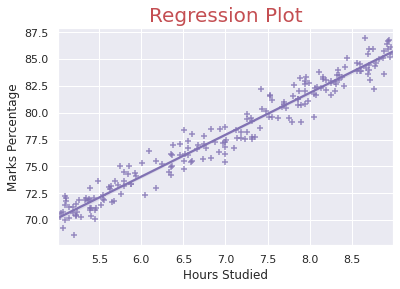

In [ ]:
sns.set_theme(style="darkgrid")
sns.regplot(x= data2['study_hours'], y= data2['student_marks'] ,marker='+',color="m")
plt.title('Regression Plot',size=20 ,color = "r")
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


Split Dataset¶

In [ ]:
X = data2.drop("student_marks", axis = "columns")
y = data2.drop("study_hours", axis = "columns")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=51 )

Train Dataset

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the Marks in percentage

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [ ]:
pd.DataFrame( np.c_[X_test,y_test,y_pred], columns = ["study_hours","student_marks","predicted_student_marks"] )

,study_hours,student_marks,predicted_student_marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [ ]:
lr.score(X_test,y_test)

0.9514124242154466

Comparing Marks

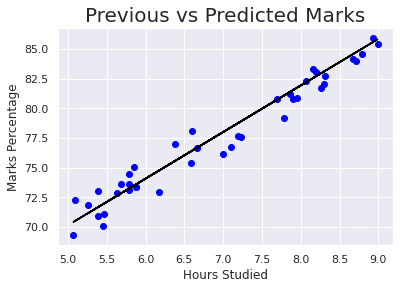

In [ ]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Previous vs Predicted Marks', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [ ]:
print('Training Score:',lr.score(X_train,y_train))
print('Test Score:',lr.score(X_test,y_test))

Training Score: 0.9589875741425085
Test Score: 0.9514124242154466


In [ ]:
#predicting scores
hour=[float(input())]
answer=lr.predict([hour])
print('Hours student study={}'.format(hour))
print('Predicted Marks={}'.format(answer[0]))

9.25
Hours student study=[9.25]
Predicted Marks=[86.85274669]


Model Performance

In [ ]:
print("R^2: {}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9514124242154466
Root Mean Squared Error: 1.0526176617137133
